In [1]:
from dataclasses import asdict
import networkx as nx

from gg_project.vertex_params import VertexType, VertexParams

In [2]:
def mk_vertex(t, pos, level):
    return asdict(VertexParams(vertex_type=t, position=pos, level=level))

In [3]:
graph = nx.Graph()

graph.add_nodes_from(
    [
        (0, mk_vertex(VertexType.START_USED, (0.5, 0.5), 0)),
        
        (1, mk_vertex(VertexType.EXTERIOR, (0.0, 0.0), 1)),
        (2, mk_vertex(VertexType.EXTERIOR, (0.0, 1.0), 1)),
        (3, mk_vertex(VertexType.EXTERIOR, (1.0, 0.0), 1)),
        (4, mk_vertex(VertexType.EXTERIOR, (1.0, 1.0), 1)),
        
        (5, mk_vertex(VertexType.INTERIOR_USED, None, 1)),
        (6, mk_vertex(VertexType.INTERIOR_USED, None, 1)),
        
        (7, mk_vertex(VertexType.EXTERIOR, (0.0, 0.0), 2)),
        (8, mk_vertex(VertexType.EXTERIOR, (0.0, 1.0), 2)),
        (9, mk_vertex(VertexType.EXTERIOR, (1.0, 0.0), 2)),
        (10, mk_vertex(VertexType.EXTERIOR, (0.5, 0.5), 2)),
        
        (11, mk_vertex(VertexType.INTERIOR, None, 2)),
        (12, mk_vertex(VertexType.INTERIOR, None, 2)),
        
        (13, mk_vertex(VertexType.EXTERIOR, (0.0, 1.0), 2)),
        (14, mk_vertex(VertexType.EXTERIOR, (1.0, 0.0), 2)),
        (15, mk_vertex(VertexType.EXTERIOR, (1.0, 1.0), 2)),
        
        (16, mk_vertex(VertexType.INTERIOR, None, 2)),
    ]
)

graph.add_edges_from(
    [
        (0, 5),
        (0, 6),
        
        (1, 2),
        (1, 3),
        (2, 3),
        (2, 4),
        (3, 4),
        
        (1, 5),
        (2, 5),
        (3, 5),
        (2, 6),
        (3, 6),
        (4, 6),
        
        (7, 8),
        (7, 9),
        (7, 10),
        (8, 10),
        (9, 10),
        
        (5, 11),
        (5, 12),
        
        (7, 11),
        (7, 12),
        (8, 11),
        (9, 12),
        (10, 11),
        (10, 12),
        
        (6, 16),
        
        (13, 14),
        (13, 15),
        (14, 15),
        
        (13, 16),
        (14, 16),
        (15, 16),
    ]
)

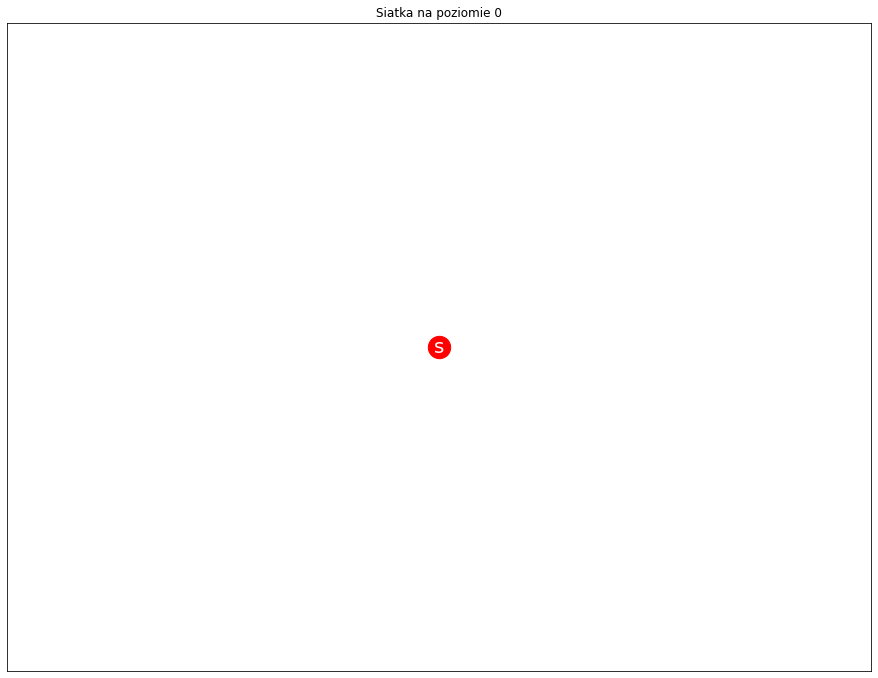

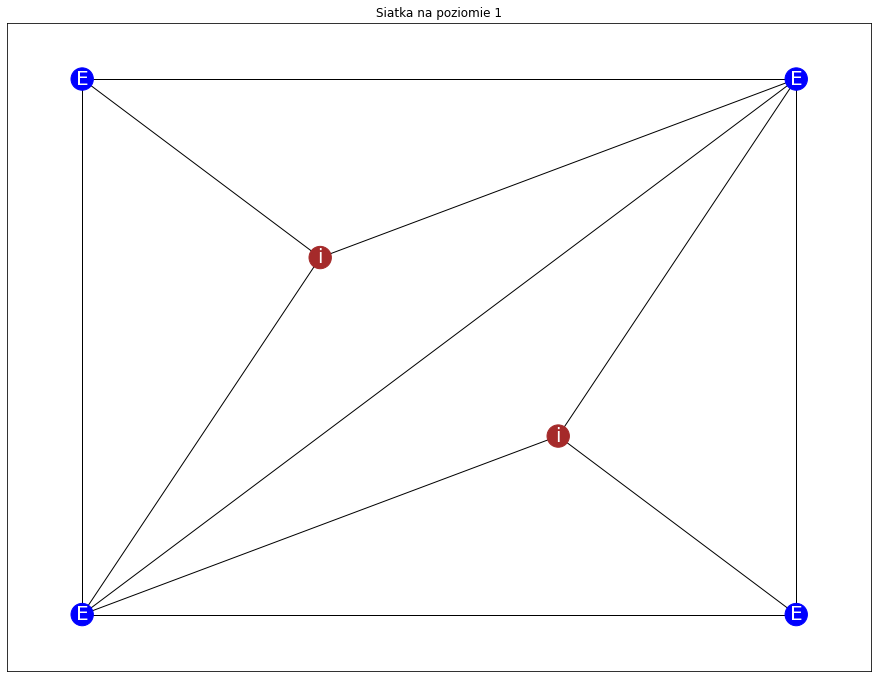

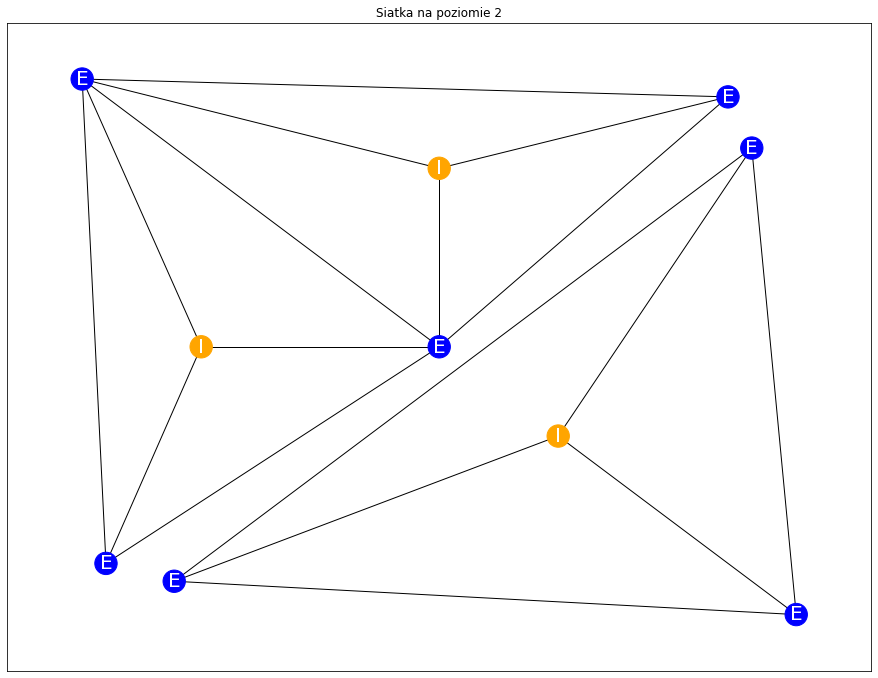

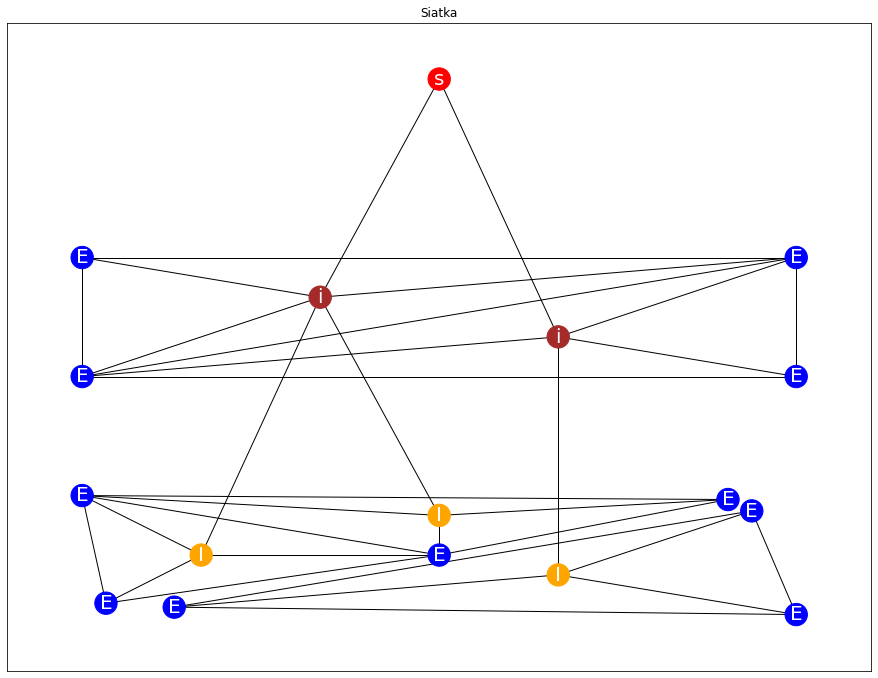

In [4]:
import matplotlib.pyplot as plt

def position(graph, node, i):
    level = node["level"]
    
    if node["position"] is not None:
        (x, y) = node["position"]
        taken = len([1 for _, node in graph.nodes.items() if node["level"] == level and node["position"] == (x, y)]) > 1
        if taken:
            for neighbor in neighbors(graph, i):
                if neighbor["level"] == level and neighbor["position"] is not None:
                    (n_x, n_y) = neighbor["position"]
                    x += (n_x - x) / 15 
                    y += (n_y - y) / 15 
        
        return (x, -(y + 2 * level))
    
    else:
        (x, y) = (0.0, 0.0)
        count = 0
        for neighbor in neighbors(graph, i):
            if neighbor["level"] == level:
                (n_x, n_y) = neighbor["position"]
                x += n_x
                y += n_y
                count += 1
        
        x /= count
        y /= count
                
        return (x, -(y + 2 * level))
    
def neighbors(graph, i):
    for ni in nx.neighbors(graph, i):
        yield graph.nodes[ni]

def draw(graph, level = None):
    nodelist = [i for i, node in graph.nodes.items() if level is None or node["level"] == level]
    
    subgraph = graph.subgraph(nodelist)
    
    pos = {i: position(subgraph, node, i) for i, node in subgraph.nodes.items()}
    labels = {i: node["vertex_type"].value for i, node in subgraph.nodes.items()}
    color_mapping = {
        "S": "red",
        "s": "red",
        "E": "blue",
        "I": "orange",
        "i": "brown",
    }
    
    node_color = [color_mapping[subgraph.nodes[i]["vertex_type"].value] for i in nodelist]
    
    fig = plt.figure(figsize=(12, 9))
    title = f"Siatka na poziomie {level}" if level is not None else "Siatka"
    ax = fig.add_axes([0, 0, 1, 1], title=title)
    nx.draw_networkx(subgraph, nodelist=nodelist, pos=pos, labels=labels, node_color=node_color, ax=ax, node_size=500, font_size=20, font_color='white')
        
draw(graph, 0)
draw(graph, 1)
draw(graph, 2)
draw(graph)